<h1>ACIDENTES AÉREOS NO BRASIL</h1>

O avião sem dúvidas, é uma das maiores invenções já feitas pelo homem.<br>

Esse gigante de metal tornou possível levar milhões de pessoas para milhares de quilômetros de distância em um curto espaço de tempo.<br>

Só para se ter uma noção de sua importância, a Agência Nacional de Aviação Civil (Anac) divulgou que entre julho de 2017 e junho de 2018 as companhias aéreas brasileiras transportaram mais de 100 milhões de pessoas!<br>

Claro que, de vez em quando, acidentes ocorrem e consequetemente várias pessoas acabam morrendo ou ficam feridas. Isso acaba 
reacendo discussões que destacam a segurança dos aviões e até onde o fator humano é capaz de influenciar no desenrolar de um acidente. <br>

Pensando nisso, irei realizar uma análise de dados em busca de informações mais superficiais sobre o assunto mas também não deixando de tentar de responder o questionamento acima. <br>

Para responder a essa e outras perguntas irei dividir o meu trabalho em duas partes.<br>

A parte da coleta e do processamento de dados será feita no próprio Jupypter Notebook. Já o Power BI ficará com a parte da exploração dos dados.

<h2>Conjuntos de Dados</h2><br>

Para o estudo estarei utilizando três arquivos que estão disponíveis no site abaixo, eles foram disponibilizados pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (Cenipa).<br>

Os dados possuem informações das ocorrências como as datas e as localizações, especificações sobre as aeronaves envolvidas e também os fatores que levaram aos acidentes.<br>

http://www.dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira

<h2>Perguntas a Responder</h2><br>

Aqui estou selecionando algumas questões que considero interessantes a se saber deste conjunto de dados:<br>
• Qual a quantidade de ocorrências e fatalidade ao longo dos últimos dez anos?<br>
• Quais as regiões e seus estados que mais possuem registros?<br>
• Qual a quantidade de aeronaves e seus tipos que mais estão envolvidas nestes acidentes?<br>
• Quais são os principais influenciadores nas causas dos acidentes?<br>
• Baseado em ocorrências onde o fator humano foi o causador, quais foram os erros mais cometidos?<br>
• Referente a pergunta anterior, em quais fases de operação eles estão mais presentes?

<h2>Coleta de Dados</h2>

Primeiramente vou começar importando as bibliotecas e os arquivos que serão utilizados!

In [1]:
# Importando as biblotecas

import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Importando os três arquivos utilizando a função read_csv do tipo (parsing) para conversão dos arquivos em Dataframes

aeronaves = pd.read_csv('./Projeto/Dados_acidentes/aeronave.csv', sep=';', encoding='utf8')

ocorrencias = pd.read_csv('./Projeto/Dados_acidentes/ocorrencia.csv', sep=';', encoding='utf8')

fatores = pd.read_csv('./Projeto/Dados_acidentes/fator_contribuinte.csv', sep=';', encoding='utf8')

Arquivos e blibliotecas importados com sucesso!

Agora chegou a hora de fazer a leitura de cada um deles.

In [3]:
# Verificando a quantidade de linhas e colunas de cada Dataset

print(aeronaves.shape)
print(ocorrencias.shape)
print(fatores.shape)

(5307, 23)
(5245, 22)
(3717, 5)


In [4]:
# Extraindo as colunas do Dataset aeronaves

aeronaves.columns

Index(['codigo_ocorrencia2', 'aeronave_matricula',
       'aeronave_operador_categoria', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_pmd_categoria', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_pais_registro', 'aeronave_registro_categoria',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino', 'aeronave_fase_operacao',
       'aeronave_tipo_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total'],
      dtype='object')

In [5]:
# Extraindo as colunas do Dataset ocorrencias

ocorrencias.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_classificacao',
       'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista'],
      dtype='object')

In [6]:
# Extraindo as colunas do Dataset fatores

fatores.columns

Index(['codigo_ocorrencia3', 'fator_nome', 'fator_aspecto',
       'fator_condicionante', 'fator_area'],
      dtype='object')

<h2>Processamento dos Dados</h2>

Eliminando algumas colunas que são consideradas irrelevantes para o estudo.

In [7]:
# Eliminando as colunas

aeronaves.drop(['aeronave_tipo_icao', 'aeronave_pmd' ,'aeronave_pmd_categoria', 'aeronave_pais_fabricante',
               'aeronave_pais_registro','aeronave_registro_categoria','aeronave_registro_segmento',
               'aeronave_tipo_operacao', 'aeronave_voo_origem', 'aeronave_voo_destino'], axis = 1, inplace = True)

ocorrencias.drop(["codigo_ocorrencia1", "codigo_ocorrencia2", "codigo_ocorrencia3", "codigo_ocorrencia4", 'ocorrencia_latitude',
                  'ocorrencia_longitude', "ocorrencia_pais", "ocorrencia_aerodromo","investigacao_aeronave_liberada", "investigacao_status", 
                  "divulgacao_relatorio_numero", "divulgacao_relatorio_publicado","divulgacao_dia_publicacao"], axis = 1, inplace = True)

Renomeando as colunas restantes

In [8]:
# Renomeando as colunas restantes

aeronaves.columns = ['Ocorrencia','Matricula','Categoria','Aeronave','Fabricante','Modelo','Motor','Qnt_Motores',
                    'Assentos','Ano_Fabricacao','Fase_Operacao','Dano','Fatalidades']

ocorrencias.columns = ['Ocorrencia','Classificacao_ocorrencias', 'Cidade', 'UF', 'Dia', 'Hora',
                      'Total_Recomendacoes', 'Aeronaves_Envolvidas', 'Saida_Pista']

fatores.columns = ['Ocorrencia', 'Fator_Nome', 'Fator_Aspecto', 'Fator_Condicionante', 'Fator_Area']

Dando uma olhada no resultado!

In [9]:
# Imprimindo as primeiras linhas do Dataset aeronave

aeronaves.head()

,Ocorrencia,Matricula,Categoria,Aeronave,Fabricante,Modelo,Motor,Qnt_Motores,Assentos,Ano_Fabricacao,Fase_Operacao,Dano,Fatalidades
0,39115,PTNQX,PARTICULAR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,PISTÃO,MONOMOTOR,4.0,1979.0,DECOLAGEM,SUBSTANCIAL,0
1,39155,PTLVI,PARTICULAR,AVIÃO,BEECH AIRCRAFT,C90,TURBOÉLICE,BIMOTOR,8.0,1979.0,DECOLAGEM,NENHUM,0
2,39156,PPPTO,REGULAR,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,TURBOÉLICE,BIMOTOR,73.0,2008.0,ARREMETIDA NO AR,LEVE,0
3,39158,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,JATO,BIMOTOR,5.0,1984.0,SUBIDA,NENHUM,0
4,39176,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,JATO,BIMOTOR,184.0,2001.0,SUBIDA,NENHUM,0


In [10]:
# Imprimindo as primeiras linhas do Dataset ocorrencias

ocorrencias.head()

,Ocorrencia,Classificacao_ocorrencias,Cidade,UF,Dia,Hora,Total_Recomendacoes,Aeronaves_Envolvidas,Saida_Pista
0,39115,ACIDENTE,CORRENTINA,BA,07/02/2010,17:40:00,2,1,NÃO
1,39155,INCIDENTE,BELO HORIZONTE,MG,05/02/2010,12:55:00,0,1,NÃO
2,39156,INCIDENTE GRAVE,CASCAVEL,PR,10/01/2010,23:15:00,2,1,NÃO
3,39158,INCIDENTE,BELÉM,PA,28/01/2010,16:00:00,0,1,NÃO
4,39176,INCIDENTE,SÃO LUÍS,MA,05/02/2010,09:30:00,0,1,NÃO


In [11]:
# Imprimindo as primeiras linhas do Dataset fatores

fatores.head()

,Ocorrencia,Fator_Nome,Fator_Aspecto,Fator_Condicionante,Fator_Area
0,39115,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39115,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39115,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,39115,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,39115,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


Alguns erros já foram identificados!

As colunas Assentos e Ano_Fabricacao do Dataset aeronaves estão no formato float64.

Vou resolver esse problema transformando a coluna Assentos para o formato int64 e depois a coluna Ano_Fabricacao para o formato de texto.

In [12]:
# Convertendo os tipos das colunas

aeronaves['Assentos'] = aeronaves.Assentos.astype('int64')

aeronaves['Ano_Fabricacao'] = aeronaves.Ano_Fabricacao.astype('object')

ValueError: Cannot convert non-finite values (NA or inf) to integer

Como visto, um erro acabou de acontecer!

Isso porque a coluna Assentos apresenta valores missing, ou seja nulos.

In [13]:
# Buscando por valores missing em todas as colunas da tabela aeronave

aeronaves.isnull().sum()

Ocorrencia          0
Matricula           0
Categoria           0
Aeronave            0
Fabricante          0
Modelo              0
Motor               0
Qnt_Motores         0
Assentos          125
Ano_Fabricacao    118
Fase_Operacao       0
Dano                0
Fatalidades         0
dtype: int64

In [14]:
# Retornando algumas linhas com esses valores

aeronaves[aeronaves.isnull().any(axis=1)].head(3)

,Ocorrencia,Matricula,Categoria,Aeronave,Fabricante,Modelo,Motor,Qnt_Motores,Assentos,Ano_Fabricacao,Fase_Operacao,Dano,Fatalidades
398,43008,HP1539,***,AVIÃO,BOEING COMPANY,737-700,PISTÃO,***,NaN,2010.0,CRUZEIRO,NENHUM,0
1565,46626,PTXXX1,PARTICULAR,HELICÓPTERO,HELIBRAS,***,TURBOEIXO,***,NaN,0.0,TÁXI,LEVE,0
2285,50389,PRBAB,PARTICULAR,AVIÃO,CIRRUS DESIGN,SR22,PISTÃO,MONOMOTOR,0.0,NaN,DECOLAGEM,NENHUM,0


In [15]:
# Buscando por valores missing em todas as colunas da tabela ocorrencias

ocorrencias.isnull().sum()

Ocorrencia                   0
Classificacao_ocorrencias    0
Cidade                       0
UF                           0
Dia                          0
Hora                         9
Total_Recomendacoes          0
Aeronaves_Envolvidas         0
Saida_Pista                  0
dtype: int64

In [16]:
# Retornando algumas linhas com esses valores

ocorrencias[ocorrencias.isnull().any(axis=1)].head(3)

,Ocorrencia,Classificacao_ocorrencias,Cidade,UF,Dia,Hora,Total_Recomendacoes,Aeronaves_Envolvidas,Saida_Pista
4998,78818,ACIDENTE,PORTO BELO,SC,07/08/2013,NaN,0,1,NÃO
4999,78819,INCIDENTE GRAVE,CAMPO GRANDE,MS,01/08/2014,NaN,0,1,NÃO
5000,78820,INCIDENTE,CAMPINAS,SP,12/08/2017,NaN,0,1,NÃO


In [17]:
# Buscando por valores missing em todas as colunas da tabela fatores

fatores.isnull().sum()

Ocorrencia             0
Fator_Nome             0
Fator_Aspecto          0
Fator_Condicionante    0
Fator_Area             0
dtype: int64

Como visto o Dataset fatores é o único dos três que já está devidamente tratado!<br>

A coluna Assentos e Ano_Fabricacao da tabela aeronaves e também a coluna Hora da tabela ocorrencias apresentam o mesmo problema.<br>

Uma coisa que eu sempre faço além de buscar valores missing é tentar identificar algum outro tipo de padrão no meio dos dados, principalmente aqueles que acontecem com mais frequência.<br>

Para isso vou buscar os dez valores que mais são frequentes nestas colunas!

In [18]:
# Os dez valores mais frequentes na coluna Assentos do dataset aeronaves

aeronaves.Assentos.value_counts().head(10)

6.0      888
2.0      811
4.0      626
1.0      491
7.0      301
0.0      206
8.0      168
10.0     153
125.0    134
11.0     124
Name: Assentos, dtype: int64

Como identificado temos os valores que são "0.0" zeros, isso está certo?

Lógicamente que não, pois não existe aeronave com uma quantidade de assentos igual a zero!

In [19]:
# Identificando algumas linhas que estão com os valores 0.0

aeronaves.loc[aeronaves['Assentos'] == 0.0,['Ocorrencia','Assentos']].head()

,Ocorrencia,Assentos
126,40330,0.0
166,40835,0.0
168,40839,0.0
177,41155,0.0
189,41274,0.0


Aqui farei o mesmo tipo de pesquisa para a coluna Ano_Fabricacao.

In [20]:
# Identificando algumas linhas que estão com os valores 0.0

aeronaves.loc[aeronaves['Ano_Fabricacao'] == 0.0, ['Ocorrencia', 'Ano_Fabricacao']].head()

,Ocorrencia,Ano_Fabricacao
153,40624,0.0
168,40839,0.0
177,41155,0.0
187,41252,0.0
189,41274,0.0


Como bem visto, a coluna Ano_Fabricacao também apresenta o mesmo problema...

Como vou resolver isso? Primeiramente vou começar convertando todos os valores nulos para "0.0" zero nas colunas Assentos e Ano_Fabricacao. Farei isso utilizando uma função que aplique este processos de uma vez só em todas as colunas.

In [21]:
# Converte valores nulos para "0.0" zero

def convert_na(dataframe, column):
    for i in column:
        dataframe[i].fillna(0.0, inplace = True)

convert_na(aeronaves,['Assentos','Ano_Fabricacao'])

In [22]:
aeronaves[aeronaves.isnull().any(axis=1)].head(3)

,Ocorrencia,Matricula,Categoria,Aeronave,Fabricante,Modelo,Motor,Qnt_Motores,Assentos,Ano_Fabricacao,Fase_Operacao,Dano,Fatalidades


Agora que os valores estão convertidos, chegou a hora de reaplicar o código que tentei acima. Ele vai alterar o tipo de cada uma das colunas!

In [23]:
# Convertendo os tipos das colunas

aeronaves['Assentos'] = aeronaves.Assentos.astype('int64')

aeronaves['Ano_Fabricacao'] = aeronaves.Ano_Fabricacao.astype('int64')

In [24]:
# Convertendo os tipos das colunas

aeronaves['Assentos'] = aeronaves.Assentos.astype('str')

aeronaves['Ano_Fabricacao'] = aeronaves.Ano_Fabricacao.astype('str')

In [25]:
aeronaves.dtypes

Ocorrencia         int64
Matricula         object
Categoria         object
Aeronave          object
Fabricante        object
Modelo            object
Motor             object
Qnt_Motores       object
Assentos          object
Ano_Fabricacao    object
Fase_Operacao     object
Dano              object
Fatalidades        int64
dtype: object

Vou trocar os valores de 0.0 da coluna Assentos e Ano_Fabricacao por "NÃO INFORMADO"

In [26]:
# Trocando os valores 0 por NÃO INFORMADOS

aeronaves['Assentos'] = aeronaves['Assentos'].replace(['0'], 'NÃO INFORMADO')

aeronaves['Ano_Fabricacao'] = aeronaves['Ano_Fabricacao'].replace(['0'], 'NÃO INFORMADO')

Não posso esquecer também da coluna Hora do Dataset ocorrencias!

Vou fazer a alteração de valores nulos apenas por um espaço vazio, ' '.

In [27]:
# ocorrencias['Hora'].fillna(' ', inplace=True)

# Usando uma função para se aplicar em várias colunas se fosse o caso:

def convert_na(dataframe, column):
    for i in column:
        dataframe[i].fillna(' ', inplace = True)

convert_na(ocorrencias,['Hora'])

Com todas as alterações feitas, vou verififcar novamente a existência de valores missing nos dados!

In [28]:
# Verificando a quantidade de valores nulos após o processamento

print(aeronaves.isnull().sum().sum())
print(ocorrencias.isnull().sum().sum())

0
0


Ao que parece tudo está certo! Porém se eu puxar mais linhas dos datasets é fácil de se encontrar valores do tipo "***" nos campos de colunas.

Isso pode ser deixado ou transformado e irei fazer isso dentro do Power BI.

In [29]:
# Retornando algumas linhas com esses valores

aeronaves.head(20)

,Ocorrencia,Matricula,Categoria,Aeronave,Fabricante,Modelo,Motor,Qnt_Motores,Assentos,Ano_Fabricacao,Fase_Operacao,Dano,Fatalidades
0,39115,PTNQX,PARTICULAR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,PISTÃO,MONOMOTOR,4,1979,DECOLAGEM,SUBSTANCIAL,0
1,39155,PTLVI,PARTICULAR,AVIÃO,BEECH AIRCRAFT,C90,TURBOÉLICE,BIMOTOR,8,1979,DECOLAGEM,NENHUM,0
2,39156,PPPTO,REGULAR,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,TURBOÉLICE,BIMOTOR,73,2008,ARREMETIDA NO AR,LEVE,0
3,39158,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,JATO,BIMOTOR,5,1984,SUBIDA,NENHUM,0
4,39176,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,JATO,BIMOTOR,184,2001,SUBIDA,NENHUM,0
5,39178,PTMZU,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,JATO,BIMOTOR,184,2001,SUBIDA,NENHUM,0
6,39235,PTWKN,AGRÍCOLA,AVIÃO,CESSNA AIRCRAFT,A188B,PISTÃO,MONOMOTOR,1,1976,DECOLAGEM,DESTRUÍDA,1
7,39275,PTYRE,PARTICULAR,HELICÓPTERO,EUROCOPTER FRANCE,AS 350 BA,TURBOEIXO,MONOMOTOR,6,1994,CRUZEIRO,DESTRUÍDA,1
8,39295,PUFLK,EXPERIMENTAL,ULTRALEVE,***,RV-9,PISTÃO,MONOMOTOR,2,2004,APROXIMAÇÃO FINAL,SUBSTANCIAL,2
9,39315,PTHLE,TÁXI AÉREO,HELICÓPTERO,HELIBRAS,HB-350B,TURBOEIXO,MONOMOTOR,6,1981,CRUZEIRO,***,2


Agora chegou a hora de salvaros arquivos já processados e aplicá-los no Power BI.

Antes de fazer isso, vou adicionar uma coluna de contagem para cada um dos datasets. Isso vai me ajudar nas visualizações.

In [30]:
# Adicionando uma coluna contagem

aeronaves['Contagem'] = 1
ocorrencias['Contagem'] = 1
fatores['Contagem'] = 1

Em seguida também vou adicionar uma nova coluna no Dataset ocorrencias, essa coluna será referente a região brasileira onde a ocorrência aconteceu e irei fazer ela baseada na coluna UF.

In [31]:
norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']

nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']

centro_oeste = ['GO', 'MT', 'MS', 'DF']

sudeste = ['ES', 'MG', 'RJ', 'SP']

sul = ['PR', 'SC', 'RS']

regioes = []

for x in ocorrencias.UF:
    if x in norte:
        regioes.append('NORTE')
    
    if x in nordeste:
        regioes.append('NORDESTE')
        
    if x in centro_oeste:
        regioes.append('CENTRO-OESTE')
        
    if x in sudeste:
        regioes.append('SUDESTE')
        
    if x in sul:
        regioes.append('SUL')
        
    if x == '***':
        regioes.append('***')
        
print(regioes[0:10])
print(len(regioes))

['NORDESTE', 'SUDESTE', 'SUL', 'NORTE', 'NORDESTE', 'SUDESTE', 'CENTRO-OESTE', 'SUDESTE', 'SUDESTE', 'NORTE']
5245


In [32]:
# Adicionando a nova coluna ao Dataset ocorrencias

ocorrencias['REGIOES'] = regioes

ocorrencias.head(10)

,Ocorrencia,Classificacao_ocorrencias,Cidade,UF,Dia,Hora,Total_Recomendacoes,Aeronaves_Envolvidas,Saida_Pista,Contagem,REGIOES
0,39115,ACIDENTE,CORRENTINA,BA,07/02/2010,17:40:00,2,1,NÃO,1,NORDESTE
1,39155,INCIDENTE,BELO HORIZONTE,MG,05/02/2010,12:55:00,0,1,NÃO,1,SUDESTE
2,39156,INCIDENTE GRAVE,CASCAVEL,PR,10/01/2010,23:15:00,2,1,NÃO,1,SUL
3,39158,INCIDENTE,BELÉM,PA,28/01/2010,16:00:00,0,1,NÃO,1,NORTE
4,39176,INCIDENTE,SÃO LUÍS,MA,05/02/2010,09:30:00,0,1,NÃO,1,NORDESTE
5,39178,INCIDENTE,CAMPINAS,SP,08/02/2010,12:33:00,0,1,NÃO,1,SUDESTE
6,39235,ACIDENTE,ITUMBIARA,GO,06/02/2010,17:20:00,3,1,NÃO,1,CENTRO-OESTE
7,39275,ACIDENTE,SÃO PAULO,SP,10/02/2010,09:03:00,3,1,NÃO,1,SUDESTE
8,39295,ACIDENTE,RIO DE JANEIRO,RJ,06/02/2010,21:09:00,0,1,NÃO,1,SUDESTE
9,39315,ACIDENTE,CANUTAMA,AM,15/01/2010,21:22:00,0,1,NÃO,1,NORTE


In [33]:
# Salvando os arquivos

aeronaves.to_csv('./Projeto/Dados/aeronaves.csv')
ocorrencias.to_csv('./Projeto/Dados/ocorrencias.csv')
fatores.to_csv('./Projeto/Dados/fatores.csv')

<h2>Exploração dos dados</h2>

<h4>• Qual a quantidade de ocorrências e de fatalidade ao longo dos últimos dez anos?</h4>
<h4>• Quais as regiões e seus estados que mais possuem registros?</h4>
<h4>• Qual a quantidade de aeronaves e seus tipos que mais estão envolvidas nestes acidentes?</h4>

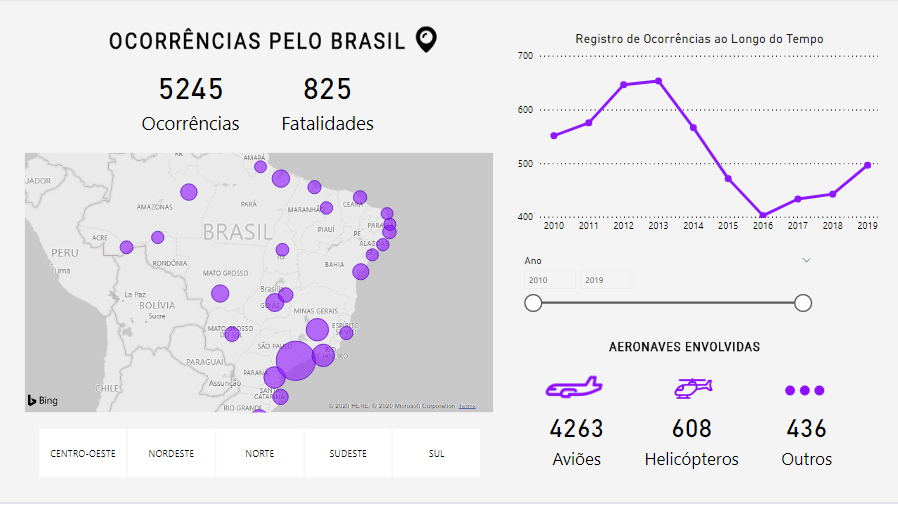

In [35]:
from IPython.display import Image

Image(filename="./dashboard/nac1.png", width=800, height=500)

Para a apresentação das primeiras informações fiz este dashboard que é constituido de gráficos de mapa e de linha.

Também estão presentes campos de filtros e também campos de somas encontrados na região inferior direita do dashboard que devolve o total e seus tipos de aeronaves envolvidas de acordo com as segmentações feitas.

Visualizando o dashboard é possível identificar-se que os estados de São Paulo, Minas Gerais e Rio de Janeiro são os que mais possuem ocorrências.

Ao lado direito temos a distribuição do total número de ocorrências registrados no Brasil ao longo do período dos últimos dez anos e abaixo é claro, a quantidade do tipo de aeronaves envolvidas.

<h4>• Quais são os principais influenciadores nas causas dos acidentes?</h4>

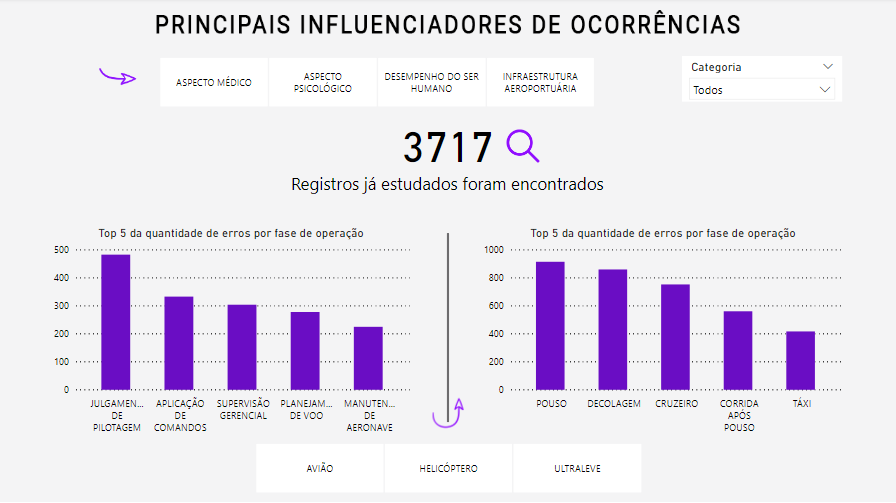

In [37]:
Image(filename="./dashboard/nac2.png", width=800, height=500)

Para responder a essa e demais perguntas construi esse outro dashboard.

Ele é constituído por três seções de filtro onde se controla os fatores que influenciaram à ocorrência dos acidentes, a categoria que aeronave estava registrada, por exemplo: agricula ou particular, e também dois gráficos de barras de colunas que devolvem os cinco maiores erros cometidos e em que fases eles mais estão presentes, isso é claro de acordo com as segmentações feitas.

Aqui vai um rápido esclarimento! Na tela anterior é possível se ver que o número total de ocorrências registradas no Brasil no perído dos últimos dez anos é igual a 5307, porém aqui agora é mostrado o valor de 3717.

Isso acontece porque nem todas as ocorrências retornam as possíveis causas dos acidentes, então por isso esse valor é retornado.

Logo, respondendo a pergunta, os principais ocasionadores de ocorrências são os fatores de aspecto médico, psicológico, desempenho do ser humano e infraestrutura aeroportuária.

<h4>• Baseado em ocorrências onde o desempenho humano foi o causador, quais foram os erros mais cometidos?</h4>

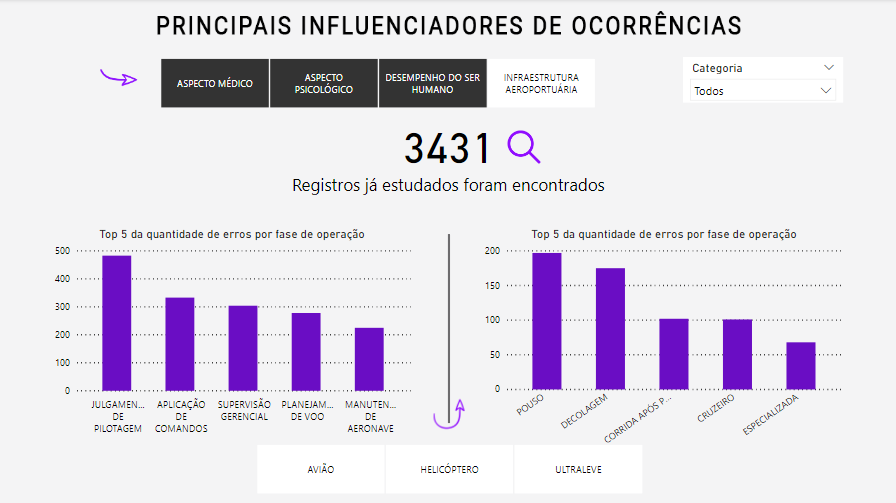

In [39]:
Image(filename="./dashboard/nac3.png", width=800, height=500)

Segmentando os dados pelos fatores humanos temos que estes são 92% do total de registros devolvidos, logo é o principal ocasionador de acidentes aéreos.

Com base nisso, o gráfico de barras da esquerda devolve os cinco maiores erros cometidos que são: o julgamento de pilotagem, a aplicação de comandos, a supervisão gerencial, o planejamento de voo e por último a manutenção de aeronaves! 

<h4>• Referente a pergunta anterior, quando cometido esses principais erros em quais fases de operação eles mais se apresentam?</h4>

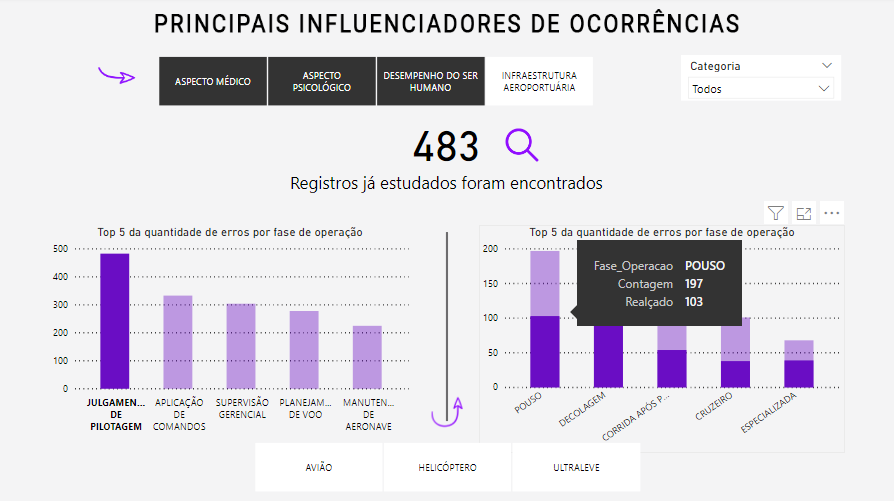

In [41]:
Image(filename="./dashboard/nac4.png", width=800, height=500)

Destacando o principal erro cometido que é o de julgamento de pilotagem, podemos ver ao lado no outro gráfico de barras que esse erro é muito presente nas fases onde a aeronave tem que fazer o pouso, sua corrida pós ao pouso e também na fase de decolagem!

<h4>O mesmo tipo de análise pode ser feito novamente, mas agora focando o estado de São Paulo!</h4>

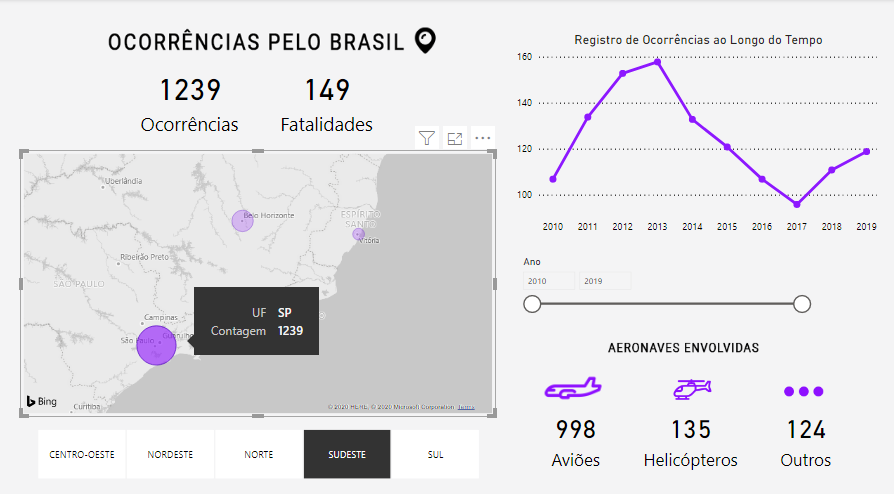

In [43]:
Image(filename="./dashboard/sp1.png", width=800, height=500)

Visualizando o gráfico de linhas é possível identificar que o número de ocorrências a partir do ano de 2017 começou a crescer novamente.

Usarei a segmentação de dados por data para olhar mais de perto essa tendência.

Dashboard atualizado com os números de ocorrências acidentes e também com o número de mortes baseado no intervalo de tempo que vai do ano de 2017 ao ano de 2019.

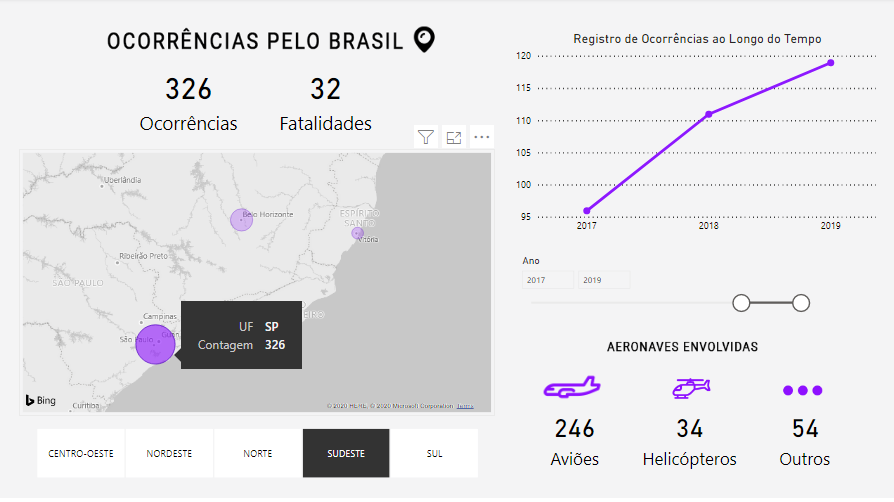

In [45]:
Image(filename="./dashboard/sp2.png", width=800, height=500)

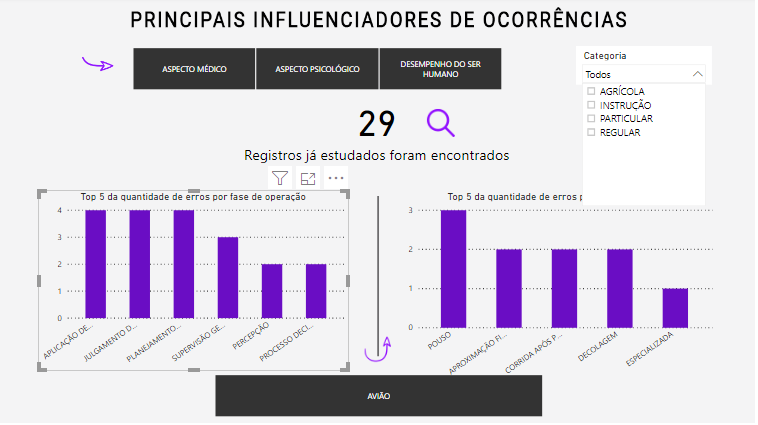

In [47]:
Image(filename="./dashboard/sp3.png", width=800, height=500)

Como dito, nem todas as ocorrências retornam as suas possíveis causas...

Acima temos todos os acidentes registrados no estado de São Paulo no período do ano de 2017 a 2019 e que já tiveram uma conclusão dos fatores que levaram a ocorrência, os erros cometidos e também já com as fases de operação onde estiveram presentes! Ainda poderia ser segmentado ainda mais pela categoria da aeronave que neste caso em questão seriam do tipo: agrícola, de instrução, particular e também do tipo regular. 

Para que se encontre as possíveis causas do aumento do número de casos registrados no estado de São Paulo é necessaário que o conjunto de dados seja alimentado com ainda mais dados!

Uma alternativa poderia ser olhar também de perto os outros estados que estão com o mesmo comportamento e tentar inferir as possíveis causas ao estado de São Paulo.

<h2>Conclusão</h2>

Com base no que se viu na exploração dos dados, pode-se dizer que o número de ocorrências registradas teve seu pico no ano de 2013 e então a partir daí começou a cair até o ano de 2017. Posteriormente se iniciou uma tendência de maiores ocorrências de acidentes aéreos. As causas para esse aumento não puderam ser investigadas por falta de dados.

Os estados brasileiros que mais possuem registros são os estados de São Paulo, Minas Gerais e Rio de Janeiro.

As aeronaves mais envolvidas nestas ocorrências são os aviões e os helicópteros.

Foi comprovado que o fator humano é o principal influenciador para o acontecimento de acidentes aéreos e os principais erros cometidos são de julgamento de pilotagem, aplicação de comandos, supervisão gerencial, planejamento de voo e de manutenção das aeronaves!

Também foi possível identificar que a maioria destes erros acontecem nas fases de pouso, pós ao pouso e também na fase de decolagem.